In [3]:
# diddn't help ;)

# import os
# os.environ["PATH"] += os.pathsep + "C:\Program Files\Graphviz\bin" + os.pathsep + "C:\Program Files\Graphviz"

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('C:/Users/User/Desktop/dtml/train.csv')

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
X = pd.get_dummies(X)

In [8]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
X = X.fillna({'Age': X.Age.median()})

In [10]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [13]:
# graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X)
#                             , class_names=['Died', 'Survived'], filled=True))

[Text(3434.2533482142853, 1325.025, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(2171.5915178571427, 1257.075, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(1096.0714285714284, 1189.125, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(448.3928571428571, 1121.175, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(408.5357142857143, 1053.225, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(368.6785714285714, 985.275, 'Age <= 11.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(328.82142857142856, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(408.5357142857143, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(448.3928571428571, 985.275, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(488.24999999999994, 1053.225, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1743.7499999999998, 1121.175, 'Embarked_C <= 0.5\ne

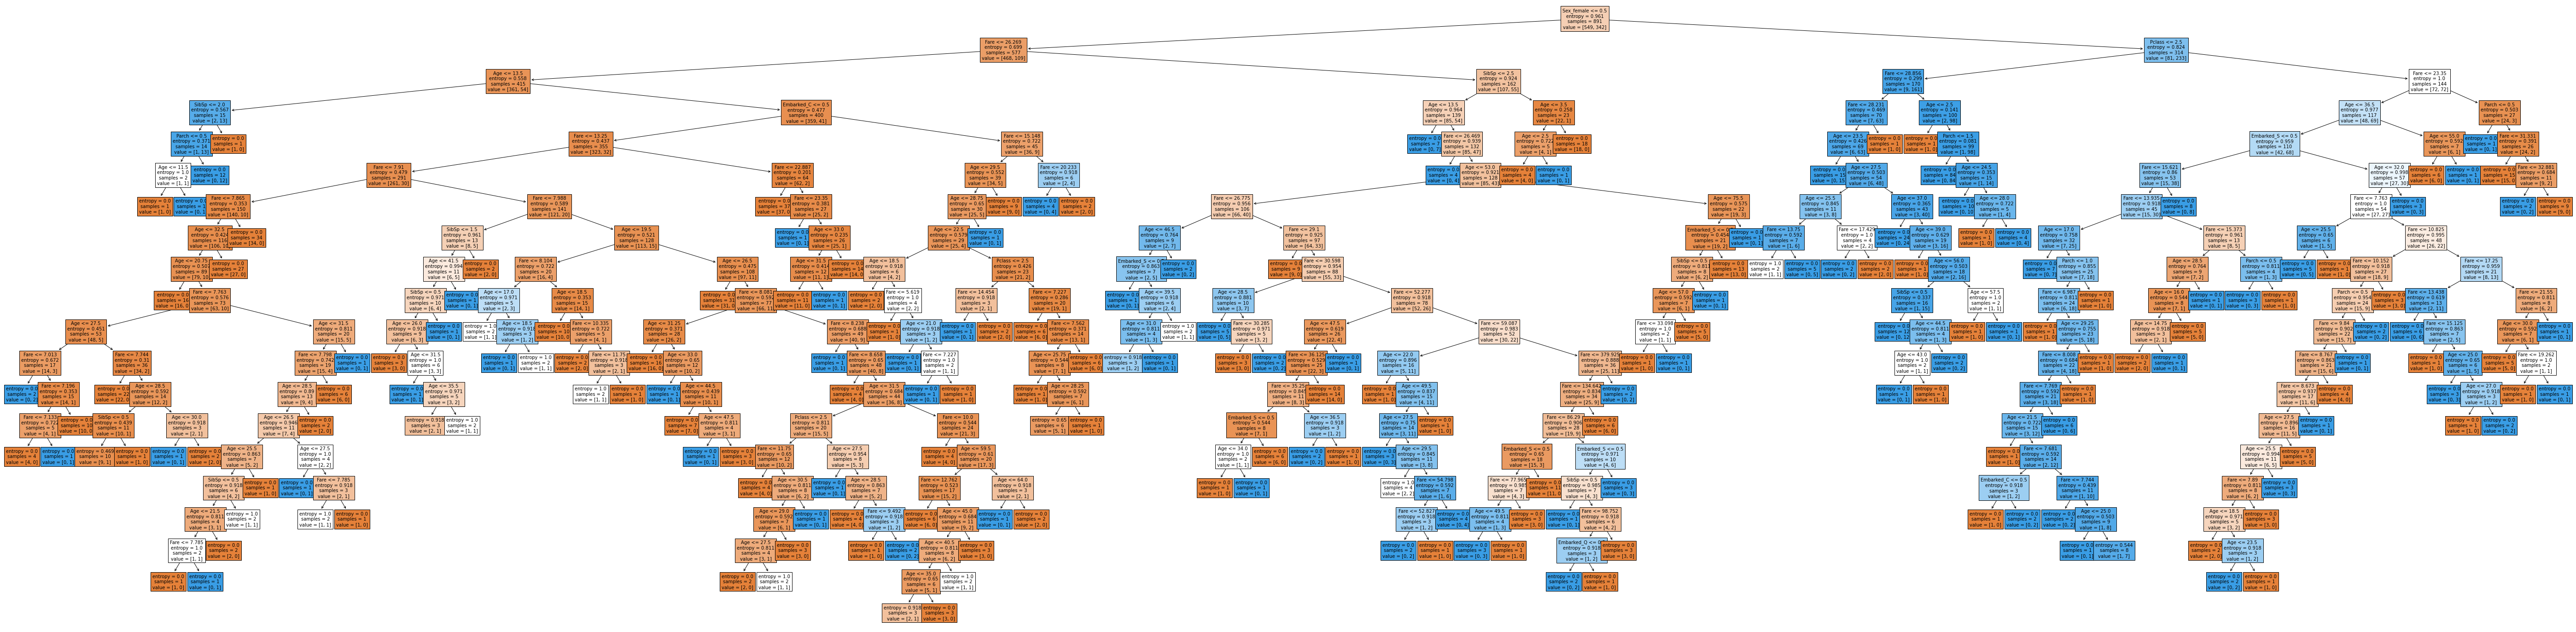

In [14]:
# does the split till the end - overfitting!
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
clf.score(X, y)

0.9797979797979798

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.score(X, y)

0.9079685746352413

In [19]:
clf.score(X_test, y_test)

0.7627118644067796

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
clf.score(X_train, y_train)

0.8406040268456376

In [23]:
clf.score(X_test, y_test)

0.8101694915254237

In [24]:
scores_data = pd.DataFrame()

In [25]:
max_depth_values = range(1, 100)

In [26]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_scores = pd.DataFrame({'max_depth':[max_depth], 
                                'train_score':[train_score], 
                                'test_score':[test_score],
                                'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_scores)

In [27]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.793669


In [28]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [29]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [30]:
scores_data_long.query("set_type=='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.793669
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.803739
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.796989
207,10,cross_val_score,0.803711


<AxesSubplot:xlabel='max_depth', ylabel='score'>

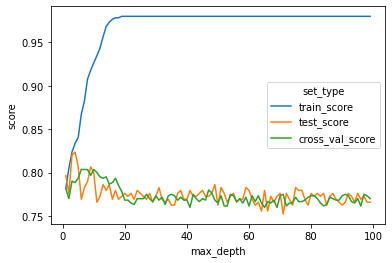

In [31]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [34]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [35]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [36]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [37]:
best_clf.score(X_train, y_train)

0.9429530201342282

In [38]:
best_clf.score(X_test, y_test)

0.7898305084745763

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
clf = tree.DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(1,30)}

In [42]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [43]:
grid_search_cv_clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [44]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [45]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [46]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=11)>

In [47]:
best_clf.score(X_test, y_test)

0.7559322033898305

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [49]:
y_pred = best_clf.predict(X_test)

In [50]:
precision_score(y_test, y_pred, average='macro')

0.7494509334131976

In [51]:
recall_score(y_test, y_pred, average='macro')

0.7379761904761906

In [52]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [53]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [54]:
y_predicted_prob

array([[0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [55]:
# show only the 2nd column
y_predicted_prob[:, 1]

array([0.57142857, 0.        , 0.13793103, 1.        , 1.        ,
       0.        , 0.85714286, 0.13793103, 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.08333333, 0.27272727,
       1.        , 0.        , 0.28571429, 0.03488372, 0.        ,
       0.03488372, 0.5       , 0.28571429, 0.13793103, 0.03488372,
       0.        , 0.5       , 0.        , 0.        , 1.        ,
       0.13793103, 1.        , 0.22222222, 1.        , 0.13793103,
       0.57142857, 0.22222222, 0.85714286, 1.        , 0.03488372,
       0.        , 1.        , 0.03488372, 0.1627907 , 0.        ,
       0.13793103, 0.13793103, 0.03488372, 0.1627907 , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.28571429,
       0.1627907 , 1.        , 1.        , 0.        , 0.1627907 ,
       1.        , 0.        , 0.03488372, 0.33333333, 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.03488

<AxesSubplot:>

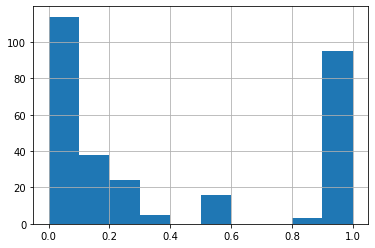

In [56]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [57]:
# like ternary operator
# if > then 1 else 0
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [58]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.57142857, 0.        , 0.13793103, 1.        , 0.85714286,
       0.08333333, 0.27272727, 0.28571429, 0.03488372, 0.5       ,
       0.22222222, 0.1627907 , 0.33333333, 0.6       ])

In [59]:
precision_score(y_test, y_pred)

0.7653061224489796

In [60]:
recall_score(y_test, y_pred)

0.625

In [61]:
y_pred1 = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)

In [62]:
precision_score(y_test, y_pred1)

0.6713286713286714

In [63]:
recall_score(y_test, y_pred1)

0.8

In [64]:
from sklearn.metrics import roc_curve, auc

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

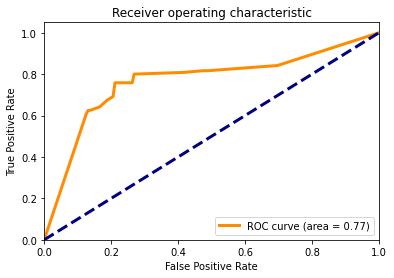

In [66]:
plt.figure()
lw = 3
plt.plot(fpr, tpr, color="darkorange", lw=lw,
    label="ROC curve (area = %0.2f)" % (roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate") # True Positive Rate = recall
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")

In [79]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [80]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

[Text(1116.0, 1426.95, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(446.4, 1019.25, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(223.2, 611.55, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(669.5999999999999, 611.55, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(446.4, 203.8499999999999, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(892.8, 203.8499999999999, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(1785.6, 1019.25, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(1562.3999999999999, 611.55, 'Fare <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(1339.1999999999998, 203.8499999999999, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]'),
 Text(1785.6, 203.8499999999999, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(2008.8, 611.55, 'entropy = 0.996\nsamples = 99\nvalue = [53, 46]')]

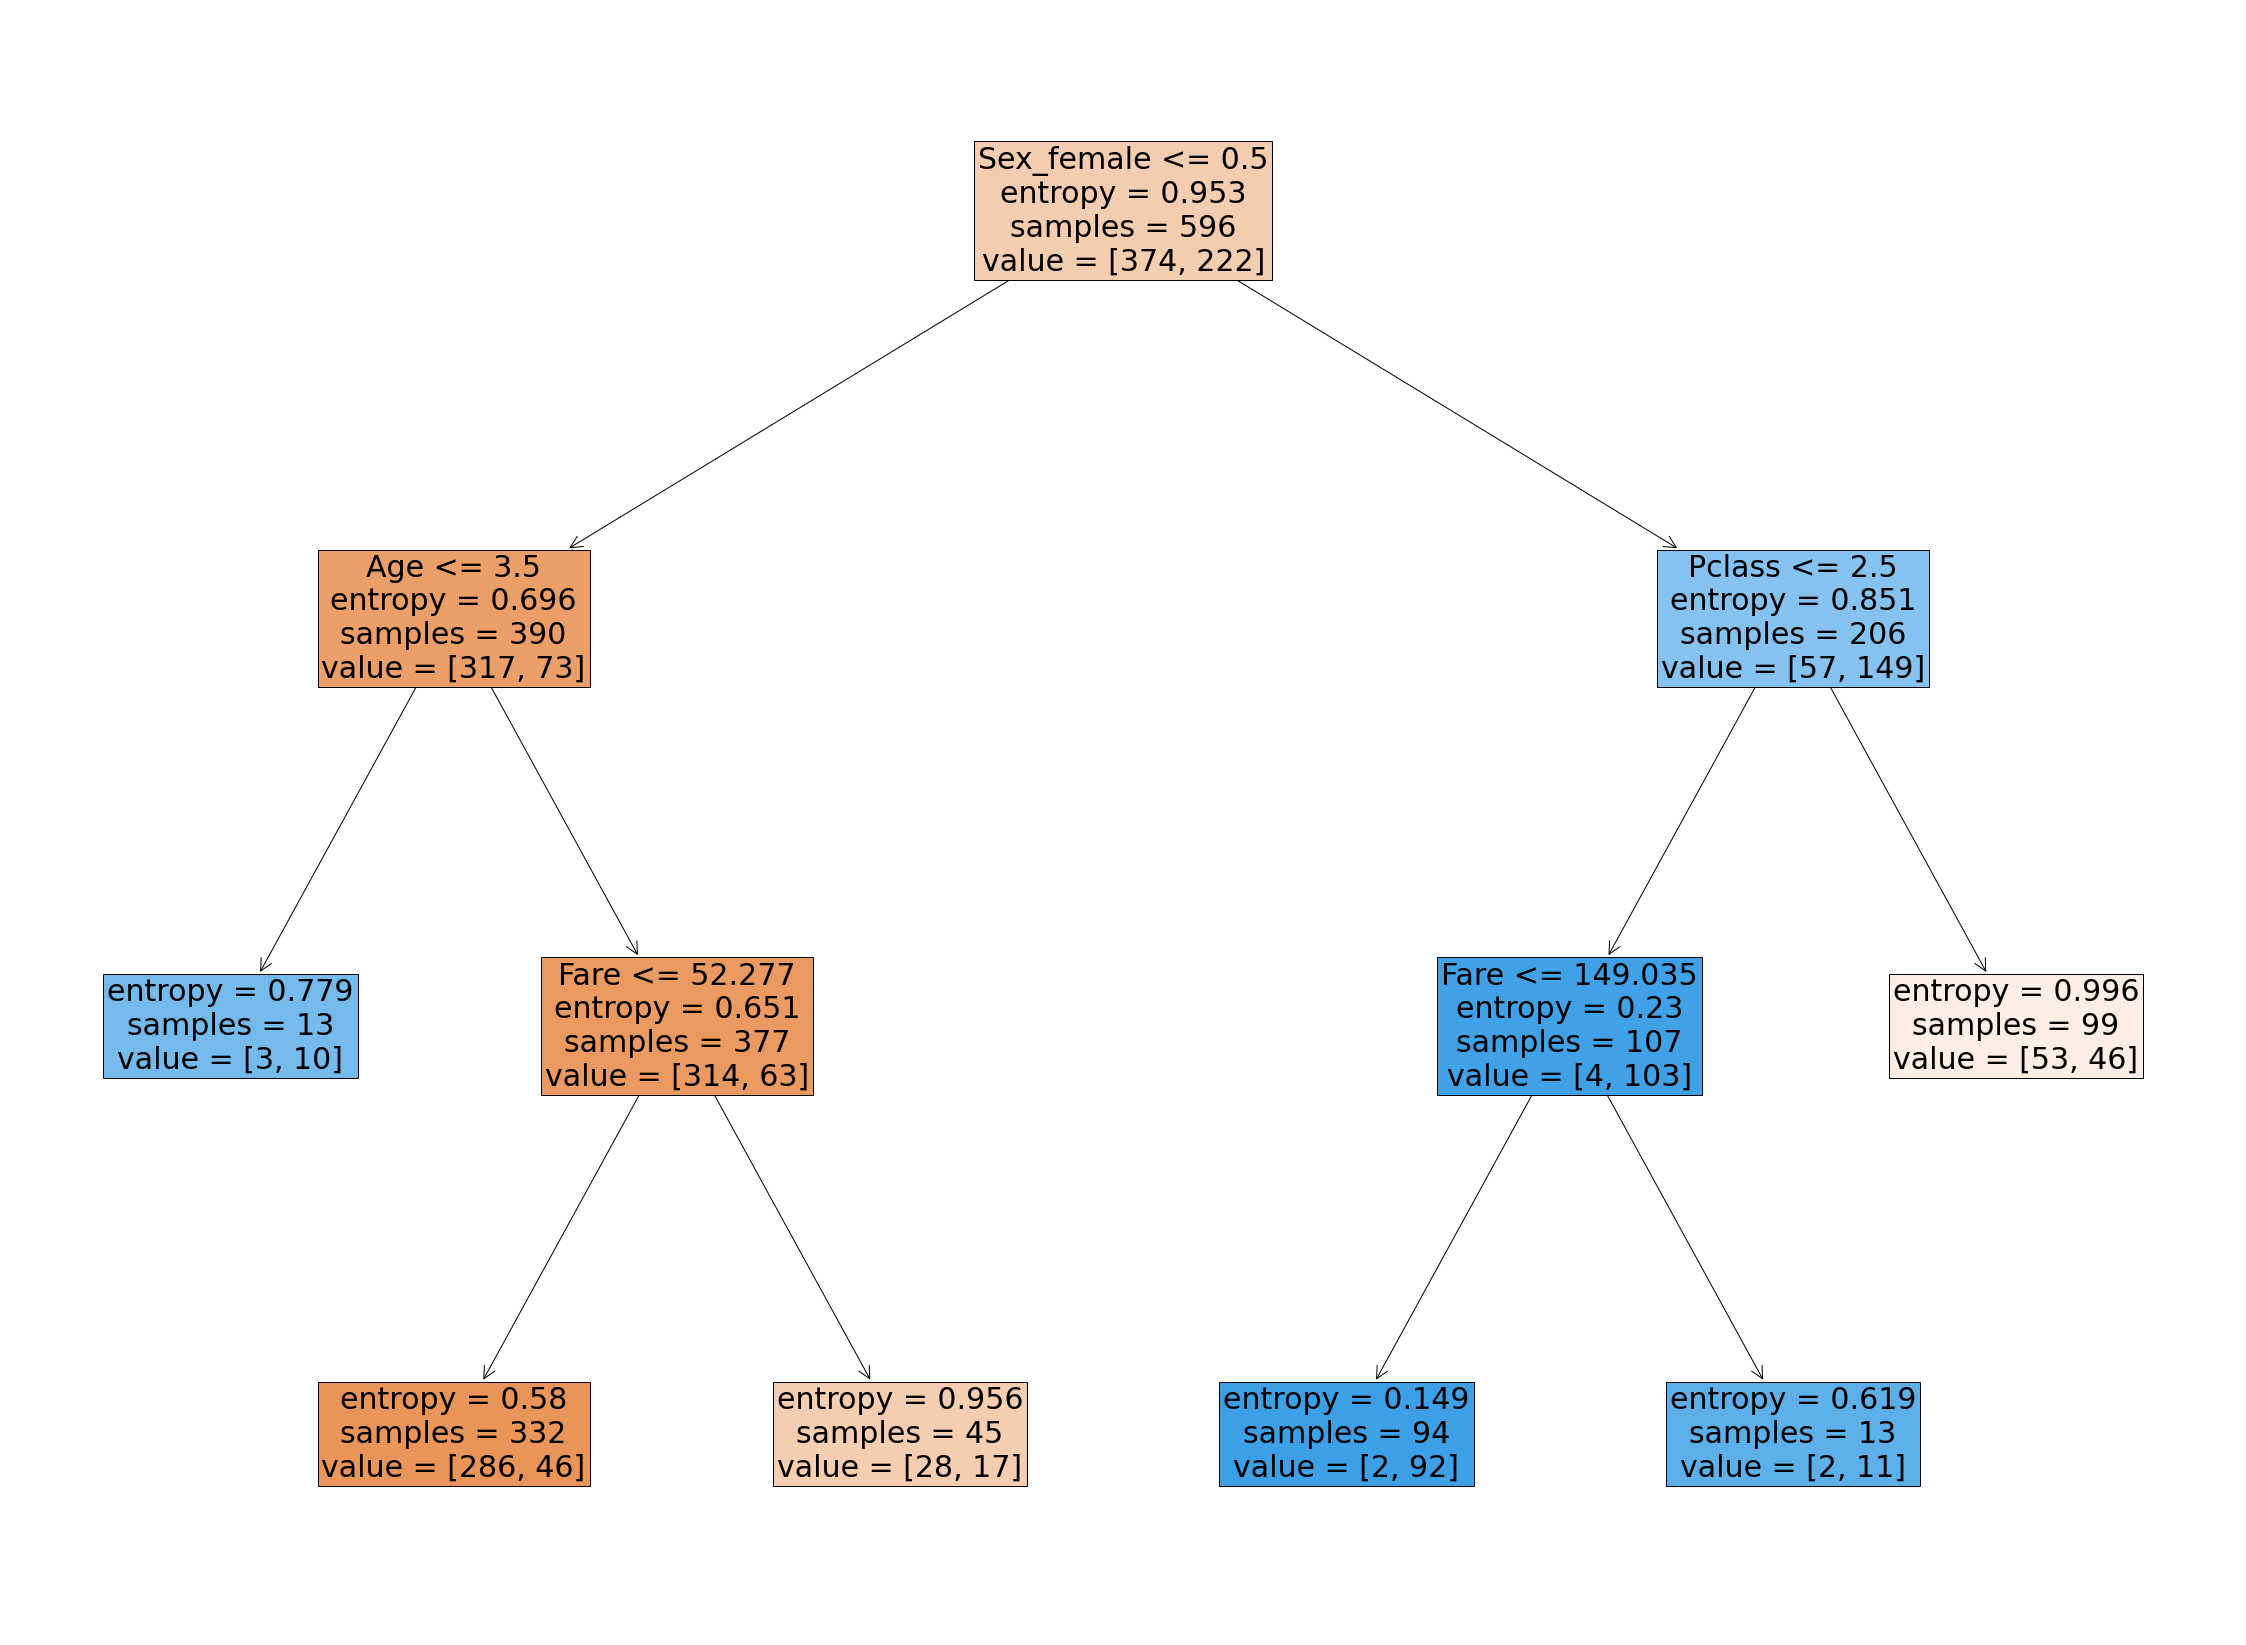

In [82]:
plt.figure(figsize=(40, 30))
tree.plot_tree(clf, fontsize=30, feature_names=list(X), filled=True)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
clf_rf = RandomForestClassifier()

In [84]:
parameters = {'n_estimators':[10,20,30], 'max_depth':[2,5,7,10]}

In [86]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [87]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [88]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [95]:
best_clf = grid_search_cv_clf.best_estimator_

In [96]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [98]:
feature_importances = best_clf.feature_importances_

In [99]:
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                      'feature_importances':feature_importances})

In [103]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.249630
6,Sex_male,0.221315
4,Fare,0.146243
0,Pclass,0.129587
1,Age,0.128193
2,SibSp,0.042392
3,Parch,0.035709
9,Embarked_S,0.019685
8,Embarked_Q,0.013706
7,Embarked_C,0.013541
